# PROJECT TITLE: WRANGLING, ANALYSING, VISUALIZING AND COMMUNICATING INSIGHTS OF DATA GOTTEN FROM FORD GOBIKE SYSTEM DATA
    
Table of Contents

> [INTRODUCTION](#INTRODUCTION)

> [GATHERING DATA](#GATHERING_DATA)

> [DATA ASSESSMENT](#DATA_ASSESSMENT)

> [DATA CLEANING](#CLEANING_DATA)

> [DATA WRANGLING AND VISUALIZATION](#DWAV)

> [SUMMARY](#SUMMARY)



# PROJECT TITLE: RELATIONSHIP BETWEEN SOCIAL STATUS AND BIKE RIDING SPORT

# INVESTIGATION OVERVIEW
This notebook looks into using python-based analytics and data wrangling in an attempt to get insights on the data gotten from ford Gobike system data. 

In this investigation, i wanted to look at how social status like age group, sex, day and social app affects the bike riding sport and if bike riding is more perculiar to some social groups or less perculiar to other social group

# DATASET OVERVIEW
The data consists of sixteen columns which includes Age, Gender, Start time, Duration seconds amongst others. It contains 183,412 rows. After excessive wrangling and Feature engineering, extra three columns were added and a total of 8652 rows was removed due to incorrect and incomplete data 

<a id='INTRODUCTION'></a>


# INTRODUCTION

# PROBLEM DEFINITION
> Wrangling and Analyzing, Visualizing and communicating insights of data gotten from ford gobike system data

> This notebook looks into using python-based analytics and data wrangling in an attempt to get insights on the dataset curated for this project.

# DATA
> The dataset used for this project came from [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)

# FEATURES
> The features of the data set used for this project included information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Some of the oinformation includes
* Latitude
* Longitude
* Member birth year
* Duration seconds
* Start time
* End time
* Start station id
* End station id
* Bike ID et.c

# QUESTIONS
* Which gender commonly ride bike
* Is age of bikers dependent on how long they can ride? 
* When are most trips taken in terms of time of day? 
* How often do suscribers ride bikes?
* Is gender of users dependent on Duration of time that users travelled? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

<a id= 'GATHERING_DATA'></a>
# GATHERING DATA

In [4]:
# import data
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<a id='DATA_ASSESSMENT'></a>
# ASSESSING DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# year is in float form instead of int format
# end station should be in int 

In [7]:
df.shape

(183412, 16)

In [8]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27794,755,2019-02-25 09:08:48.9620,2019-02-25 09:21:24.7910,74.0,Laguna St at Hayes St,37.776435,-122.426244,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,634,Subscriber,1992.0,Male,No
23512,151,2019-02-25 20:16:51.8420,2019-02-25 20:19:23.6610,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,200.0,2nd Ave at E 18th St,37.800214,-122.253810,6069,Subscriber,NaN,NaN,No
210,211,2019-02-28 22:29:45.1110,2019-02-28 22:33:16.2460,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,129.0,Harrison St at 20th St,37.758862,-122.412544,5271,Subscriber,1986.0,Male,No
15163,255,2019-02-27 09:56:40.8930,2019-02-27 10:00:56.7570,356.0,Valencia St at Clinton Park,37.769188,-122.422285,109.0,17th St at Valencia St,37.763316,-122.421904,2003,Subscriber,1945.0,Male,Yes
48927,456,2019-02-22 06:27:45.8190,2019-02-22 06:35:22.3160,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,90.0,Townsend St at 7th St,37.771058,-122.402717,176,Subscriber,1992.0,Male,No
152731,669,2019-02-06 14:49:52.4850,2019-02-06 15:01:02.4160,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3542,Subscriber,1982.0,Male,No
36201,735,2019-02-23 16:41:39.0830,2019-02-23 16:53:54.5720,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,86.0,Market St at Dolores St,37.769305,-122.426826,6288,Subscriber,1986.0,Female,No
53760,188,2019-02-21 14:56:48.1870,2019-02-21 14:59:57.1610,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,4915,Subscriber,1995.0,Male,Yes
122494,1514,2019-02-11 11:27:48.5910,2019-02-11 11:53:02.6240,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,36.0,Folsom St at 3rd St,37.783830,-122.398870,2650,Subscriber,1996.0,Female,No
32953,406,2019-02-24 13:12:08.3370,2019-02-24 13:18:54.5870,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,10.0,Washington St at Kearny St,37.795393,-122.404770,5239,Subscriber,1993.0,Male,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
# Start time and end time should be in datetime
# there are missing values

In [11]:
# Check for duplicated values
df[df.bike_id.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
41,346,2019-02-28 23:40:56.0750,2019-02-28 23:46:42.4830,10.0,Washington St at Kearny St,37.795393,-122.404770,19.0,Post St at Kearny St,37.788975,-122.403452,6488,Subscriber,1992.0,Male,No
51,532,2019-02-28 23:30:37.9410,2019-02-28 23:39:30.2060,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,349.0,Howard St at Mary St,37.781010,-122.405666,6361,Customer,1984.0,Male,No
62,325,2019-02-28 23:27:40.7690,2019-02-28 23:33:06.0440,36.0,Folsom St at 3rd St,37.783830,-122.398870,10.0,Washington St at Kearny St,37.795393,-122.404770,6329,Subscriber,1967.0,Male,Yes
81,294,2019-02-28 23:15:21.1130,2019-02-28 23:20:15.7980,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,5938,Subscriber,1992.0,Female,No
87,2151,2019-02-28 22:42:05.2150,2019-02-28 23:17:56.9670,78.0,Folsom St at 9th St,37.773717,-122.411647,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5411,Subscriber,1972.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [12]:
df[df.bike_id==4960]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
170,260,2019-02-28 22:38:36.7820,2019-02-28 22:42:56.8560,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,36.0,Folsom St at 3rd St,37.783830,-122.398870,4960,Subscriber,1994.0,Male,No
530,309,2019-02-28 21:10:53.0230,2019-02-28 21:16:02.7160,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,4960,Subscriber,1994.0,Male,No
2796,790,2019-02-28 17:42:44.9450,2019-02-28 17:55:55.3250,66.0,3rd St at Townsend St,37.778742,-122.392741,58.0,Market St at 10th St,37.776619,-122.417385,4960,Subscriber,1980.0,Male,No
7657,741,2019-02-28 08:50:05.7400,2019-02-28 09:02:27.3770,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1994.0,Male,No
8901,879,2019-02-28 07:51:07.9500,2019-02-28 08:05:47.2810,81.0,Berry St at 4th St,37.775880,-122.393170,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,4960,Subscriber,1984.0,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182678,1604,2019-02-01 07:38:37.0290,2019-02-01 08:05:21.4310,10.0,Washington St at Kearny St,37.795393,-122.404770,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,4960,Subscriber,1985.0,Male,No
183289,770,2019-02-01 05:27:16.4650,2019-02-01 05:40:07.2340,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,10.0,Washington St at Kearny St,37.795393,-122.404770,4960,Subscriber,1959.0,Male,No
183378,659,2019-02-01 00:53:36.1430,2019-02-01 01:04:35.3710,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4960,Subscriber,1985.0,Other,No
183389,184,2019-02-01 00:43:56.5560,2019-02-01 00:47:01.0090,66.0,3rd St at Townsend St,37.778742,-122.392741,47.0,4th St at Harrison St,37.780955,-122.399749,4960,Subscriber,1985.0,Other,No


In [13]:
df[df.bike_id==6488]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
41,346,2019-02-28 23:40:56.0750,2019-02-28 23:46:42.4830,10.0,Washington St at Kearny St,37.795393,-122.404770,19.0,Post St at Kearny St,37.788975,-122.403452,6488,Subscriber,1992.0,Male,No
3325,658,2019-02-28 17:18:14.8670,2019-02-28 17:29:13.6860,58.0,Market St at 10th St,37.776619,-122.417385,10.0,Washington St at Kearny St,37.795393,-122.404770,6488,Subscriber,1993.0,Male,No
3794,408,2019-02-28 16:56:35.4470,2019-02-28 17:03:24.1420,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,58.0,Market St at 10th St,37.776619,-122.417385,6488,Subscriber,1998.0,Male,No
3948,244,2019-02-28 16:46:39.9490,2019-02-28 16:50:44.2300,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6488,Subscriber,1987.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104400,285,2019-02-14 08:38:30.8850,2019-02-14 08:43:16.1440,78.0,Folsom St at 9th St,37.773717,-122.411647,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6488,Subscriber,1990.0,Female,No
104614,233,2019-02-14 08:24:17.9430,2019-02-14 08:28:11.4580,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,78.0,Folsom St at 9th St,37.773717,-122.411647,6488,Subscriber,1992.0,Male,Yes
104771,227,2019-02-14 08:12:27.5120,2019-02-14 08:16:15.0110,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6488,Subscriber,1985.0,Male,No
105102,429,2019-02-14 07:42:30.5180,2019-02-14 07:49:40.2550,90.0,Townsend St at 7th St,37.771058,-122.402717,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,6488,Subscriber,1983.0,Male,No


In [14]:
# After research, I concluded that since the bikes are for rentage, multiple people can rent the same bike at different time
# convert year,start_time,end_time to datetime
def convert_datetimes(dataframe, column):
    dataframe[column]= pd.to_datetime(dataframe[column])
    
convert_datetimes(df, 'start_time')
convert_datetimes(df, 'end_time')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [15]:
# Check for missing values
df[df['member_birth_year'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [16]:
len(df[df['member_birth_year'].isna()])

8265

In [17]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [18]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [19]:
# There are absurd birth years, e.g 1878-1930. it is not possible for people that are over or almost 100years to still be riding bike

In [20]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [21]:
new_df= df.dropna()

In [22]:
len(new_df)

174952

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

<a id= 'CLEANING_DATA'></a>
# DATA CLEANING

In [24]:
# convert_to_int function
def convert_to_int(df, column):
    df[column]= df[column].astype(int)

In [25]:
# convert member birth year to int
convert_to_int(new_df,'member_birth_year')

C:\Users\USER\AppData\Local\Temp/ipykernel_5448/3745201165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= df[column].astype(int)


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [27]:
new_df.start_station_id.value_counts()

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
         ... 
234.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [28]:
# Convert start_station_id and end_station_id to int
convert_to_int(new_df, 'start_station_id')
convert_to_int(new_df, 'end_station_id')

C:\Users\USER\AppData\Local\Temp/ipykernel_5448/3745201165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= df[column].astype(int)


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [30]:
new_df.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [31]:
new_df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [32]:
new_df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [33]:
# Convert user type and member_gender to categorical 
# convert_to_categorical function
def convert_to_categorical(df, column):
    df[column]= pd.Categorical(df[column])

In [34]:
convert_to_categorical(new_df, 'member_gender')
convert_to_categorical(new_df, 'user_type')

C:\Users\USER\AppData\Local\Temp/ipykernel_5448/1821898298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= pd.Categorical(df[column])


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [36]:
# Clean absurd member birth year
new_df['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1928        1
1878        1
1930        1
1910        1
1927        1
Name: member_birth_year, Length: 75, dtype: int64

In [37]:
new_df[new_df['member_birth_year']==1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [38]:
# according to google, cyclist aged over 80 years are more likely to be killed while out cycling so i am going to remove all birth year that are older than 80
new_df= new_df[new_df['member_birth_year'] >= 1939]

In [39]:
new_df['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1942       21
1946       19
1939       11
1941        9
1944        2
Name: member_birth_year, Length: 62, dtype: int64

In [40]:
new_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
178016,559,2019-02-01 18:05:23.841,2019-02-01 18:14:43.151,16,Steuart St at Market St,37.794130,-122.394430,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4626,Subscriber,1974,Male,No
96970,1047,2019-02-15 09:19:32.698,2019-02-15 09:36:59.832,41,Golden Gate Ave at Polk St,37.781270,-122.418740,6,The Embarcadero at Sansome St,37.804770,-122.403234,5222,Subscriber,1990,Female,No
155158,289,2019-02-06 09:04:45.980,2019-02-06 09:09:35.422,245,Downtown Berkeley BART,37.870139,-122.268422,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,5455,Subscriber,1994,Male,No
53383,1144,2019-02-21 15:40:41.578,2019-02-21 15:59:46.370,58,Market St at 10th St,37.776619,-122.417385,27,Beale St at Harrison St,37.788059,-122.391865,4659,Subscriber,1965,Male,Yes
100372,164,2019-02-14 18:31:52.004,2019-02-14 18:34:36.880,182,19th Street BART Station,37.809013,-122.268247,180,Telegraph Ave at 23rd St,37.812678,-122.268773,588,Subscriber,1984,Male,No


<a id='DWAV'></a>
# DATA WRANGLING AND VISUALIZATION

# Question
what is the most popular biker gender in San Francisco Bay area

# DISTRIBUTION OF GENDERS OF USERS
Gender of users was visualized on a barchart so as to easily show how gender that rode bikes in a simple form. I observed that Male have the highest ratio of cyclist

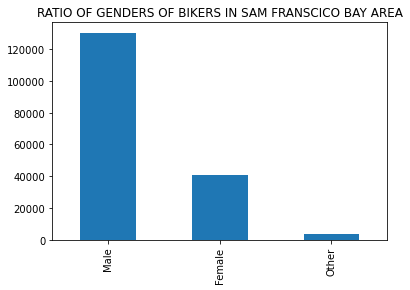

In [41]:
# Visualization
new_df.member_gender.value_counts().plot.bar(title='RATIO OF GENDERS OF BIKERS IN SAM FRANSCICO BAY AREA');

# Observation
* Male have the highest ratio of cyclist
* Female have the second most highest Ratio

# Question
* What are the user type of bikers as they are registed in the database

# Users Of Ford Gobike System
The ratio of Users of ford gobike system was visualized on a bar chat and it was discovered that users majorly comprises of Suscribers and customers but Suscribers made up of over 70% of bikers ecosystem in San Fransisco Bay area

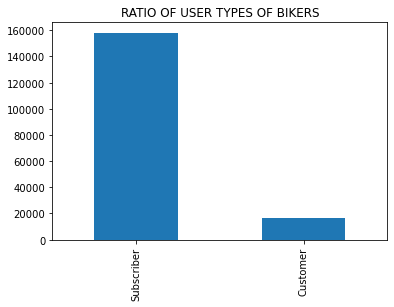

In [42]:
# VISUALIZATION
new_df.user_type.value_counts().plot.bar(title= 'RATIO OF USER TYPES OF BIKERS');

# OBSERVATION
* Suscribers made up of over 70% of bikers ecosystem in San Fransisco Bay area

# Question
* What are the age groups of bikers

# Age group of bike riders
 The age group of bike riders in this dataset was plotted on a bar chat.I discovered that the age grop between 29-31 has the largest distribution and 65 - 80 has the lowest distribution of bikers. this depicts that the older an individual grow, the less likely they will ride bike 


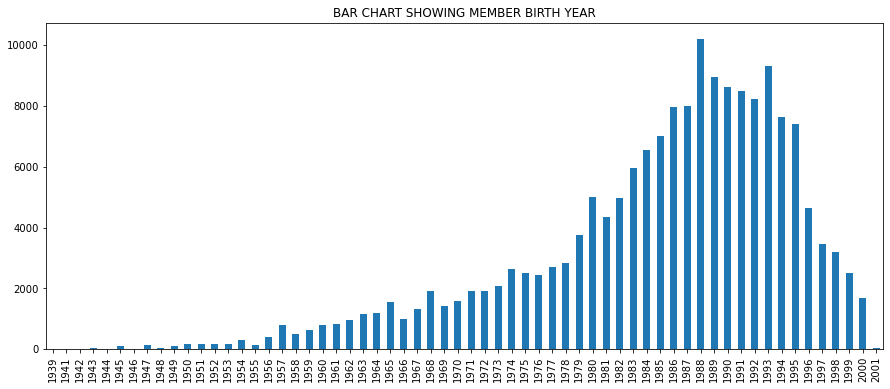

In [43]:
# VISUALIZATION
new_df['member_birth_year'].value_counts().sort_index().plot.bar(figsize= (15,6), title='BAR CHART SHOWING MEMBER BIRTH YEAR');

# Observation
* 1988 has the highest ratio and 1944 has the lowest bikers. 
* This is understandable because people born in 1944 doesnt have much vigor as people born in 1988

# Questions
* Do bikers share trips?

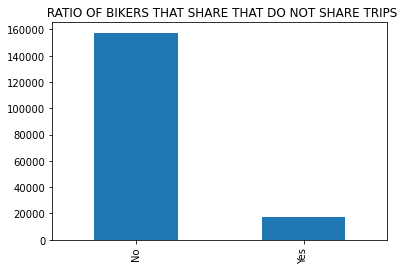

In [44]:
# Visualization
new_df.bike_share_for_all_trip.value_counts().plot.bar(title= ' RATIO OF BIKERS THAT SHARE THAT DO NOT SHARE TRIPS');

# Observation
* Higher percentage of bikers do not share trips

In [45]:
new_df.duration_sec.value_counts()

272     308
323     284
305     282
369     280
274     276
       ... 
4080      1
2827      1
8199      1
3993      1
2822      1
Name: duration_sec, Length: 4429, dtype: int64

In [46]:
new_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
117854,397,2019-02-11 20:05:58.473,2019-02-11 20:12:36.470,50,2nd St at Townsend St,37.780526,-122.390288,24,Spear St at Folsom St,37.789677,-122.390428,3595,Subscriber,1992,Male,No
178347,422,2019-02-01 17:20:58.511,2019-02-01 17:28:01.121,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,266,Parker St at Fulton St,37.862464,-122.264791,3307,Subscriber,1998,Male,Yes
22654,778,2019-02-26 07:18:57.011,2019-02-26 07:31:55.258,76,McCoppin St at Valencia St,37.771662,-122.422423,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4965,Subscriber,1985,Female,No
46961,932,2019-02-22 09:04:18.310,2019-02-22 09:19:50.735,350,8th St at Brannan St,37.771431,-122.405787,22,Howard St at Beale St,37.789756,-122.394643,1511,Subscriber,1987,Male,No
4913,601,2019-02-28 14:33:27.063,2019-02-28 14:43:29.051,277,Morrison Ave at Julian St,37.333658,-121.908586,280,San Fernando St at 7th St,37.337122,-121.883215,3783,Subscriber,1995,Male,Yes
147102,525,2019-02-07 08:11:40.857,2019-02-07 08:20:26.703,16,Steuart St at Market St,37.794130,-122.394430,50,2nd St at Townsend St,37.780526,-122.390288,1106,Subscriber,1970,Male,No
116610,324,2019-02-12 07:36:15.851,2019-02-12 07:41:40.468,210,45th St at Manila,37.833294,-122.256224,176,MacArthur BART Station,37.828410,-122.266315,710,Subscriber,1983,Male,No
117279,187,2019-02-11 23:07:26.236,2019-02-11 23:10:33.528,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,269,Telegraph Ave at Carleton St,37.862320,-122.258801,4668,Subscriber,1982,Male,No
54237,1197,2019-02-21 13:09:48.306,2019-02-21 13:29:45.415,246,Berkeley Civic Center,37.869060,-122.270556,157,65th St at Hollis St,37.846784,-122.291376,2062,Customer,1986,Female,No
31840,548,2019-02-24 15:47:08.715,2019-02-24 15:56:16.841,28,The Embarcadero at Bryant St,37.787168,-122.388098,47,4th St at Harrison St,37.780955,-122.399749,2516,Subscriber,1971,Male,No


# Question
How are genders distributed across user type

In [47]:
gen_user= pd.crosstab(new_df['user_type'], new_df['member_gender'])
gen_user

member_gender,Female,Male,Other
user_type,,,
Customer,4622,11487,448
Subscriber,36149,118858,3196


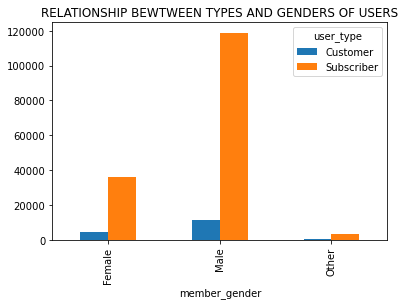

In [48]:
# Visualization
gen_user.T.plot.bar(title='RELATIONSHIP BEWTWEEN TYPES AND GENDERS OF USERS');

# Observation
* Male gender subscriber has the largest distribution 
* Other gender customer has the lowest distribution
* Almost bikers are suscribers

In [49]:
# Create age column
new_df['member_age']= 2019- new_df['member_birth_year']

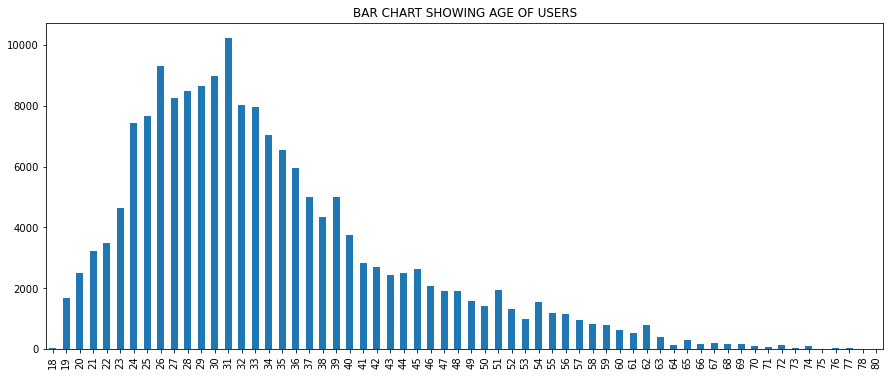

In [50]:
# Visualization
new_df['member_age'].value_counts().sort_index().plot.bar(figsize= (15,6),title='BAR CHART SHOWING AGE OF USERS');

In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  int32         
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  int32         
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  int64         
 12  user_type       

# Question
* What is the relationship between Duration seconds and member age

# Relationship between duration seconds and member age
The relationship between duratiion seconds and member age was plotted on a scattered plot. outliers were removed by setting the quantile to 0.75. I deducted Duration Seconds and members age have negative correlation and as the Age is increasing, Duration Seconds is decreasing

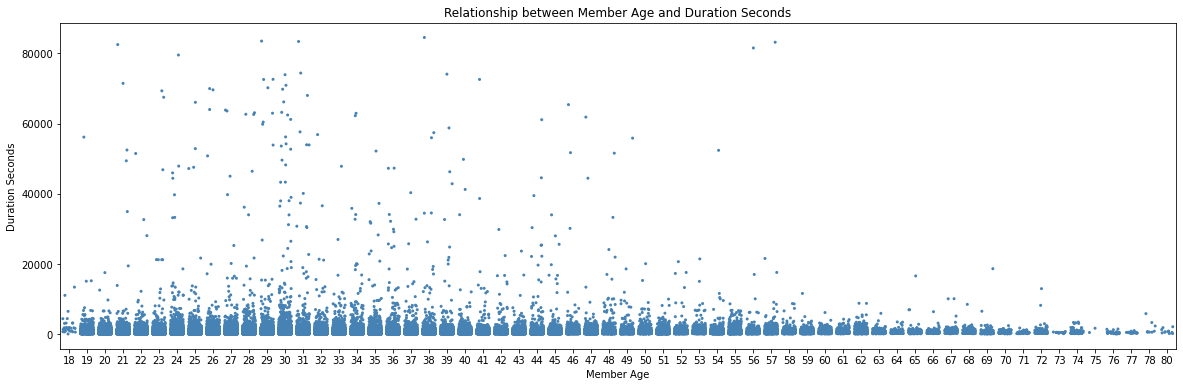

In [52]:
# Visualization
# write a function to avoid repeating codes
def scatter_plot(data, x, y):
    fig, ax= plt.subplots(figsize=(20,6))
    sns.stripplot(data= data, y=y,x=x, jitter= 0.35, color='steelblue', size=3)
    plt.title( 'Relationship between Member Age and Duration Seconds')
    plt.ylabel('Duration Seconds')
    plt.xlabel('Member Age');

scatter_plot(data= new_df, y= 'duration_sec', x= 'member_age')

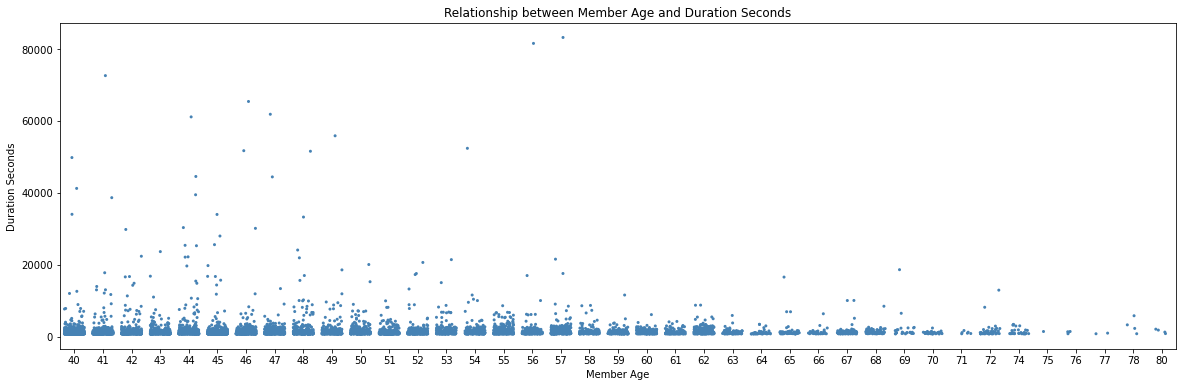

In [53]:
# Remove outliers so as to capture all value
quantile= new_df.query('duration_sec> duration_sec.quantile(0.75) and member_age>member_age.quantile(0.75)')
scatter_plot(data= quantile, y= 'duration_sec', x= 'member_age')

# OBSERVATION
* Duration Seconds and members age have negative correlation
* As the Age is increasing, Duration Seconds is decreasing

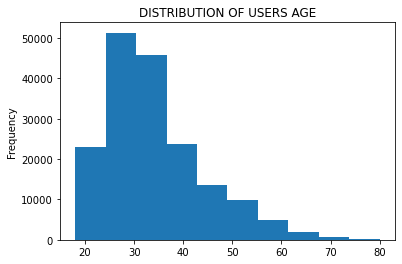

In [54]:
# Visualization
new_df.member_age.plot.hist(title= 'DISTRIBUTION OF USERS AGE');

# OBSERVATION
* There are outliers in the Age column
* The coolumn is bimodal
* The Data are skewed to the right with the peak within the range of 29 - 34

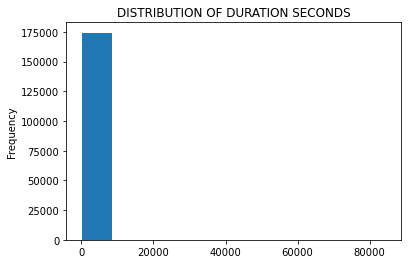

In [55]:
new_df.duration_sec.plot.hist(title= 'DISTRIBUTION OF DURATION SECONDS');

# OBSERVATION
* the duration seconds column is skewed to the right

# Question
* What is the relationship between the gender of members and duration seconds

# Relationship between gender of and duration seconds
This relationship was plotted on a violin plot so as to get the distribution of the plots. I found out that female has the highest range of duration seconds while Male has the largest distribution of Duration seconds and that duration seconds is not dependent on gender as i thought it would be

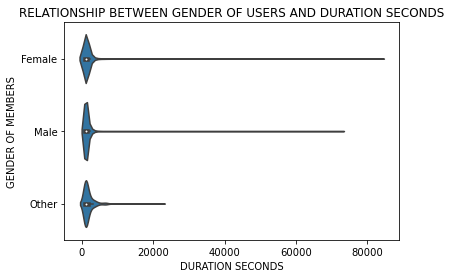

In [56]:
# Visualization
sns.violinplot(data= quantile, y= 'member_gender', x= 'duration_sec', color=sns.color_palette()[0])
plt.title('RELATIONSHIP BETWEEN GENDER OF USERS AND DURATION SECONDS')
plt.ylabel('GENDER OF MEMBERS')
plt.xlabel('DURATION SECONDS');

# Observations
* Female has the highest range of duration seconds
* Male has the largest distribution of Duration seconds

# Question
* What is the correlation of the dataset

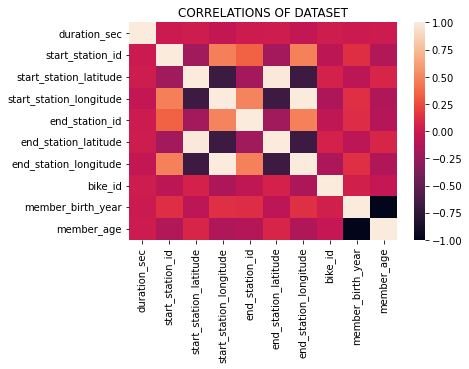

In [57]:
# Visualization
sns.heatmap(new_df.corr())
plt.title('CORRELATIONS OF DATASET');

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  int32         
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  int32         
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  int64         
 12  user_type       

# Question
* what is the relationship between member age, duration seconds and member_gender

# Relationship between member age, duration seconds and member_gender
This relationship was plotted on a scatter plot so as to get the distribution of the plots. I found out that Male has the largest distribution of data, Female has the highest distribution of data and Bikers that are between the age of 29-31 have higher duration seconds as compared to bikers of other age group

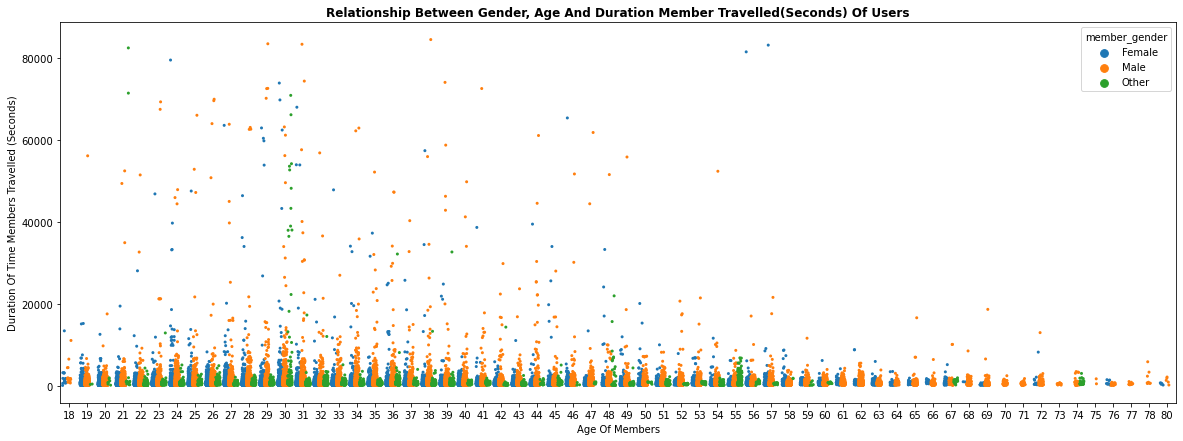

In [59]:
# Create a funtion to avoid repeating codes
def scatter_vis(data, x,y, hue):
    plt.figure(figsize= (20,7))
    plot= sns.stripplot(data= new_df,
                        x=x,
                        y= y, 
                        hue= hue, 
                        size= 3, jitter= 0.35, dodge= True )
    plt.xlabel('AGE OF MEMBERS'.title())
    plt.ylabel('DURATION OF TIME MEMBERS TRAVELLED (SECONDS)'.title())
    plt.title('RELATIONSHIP BETWEEN GENDER, AGE AND DURATION MEMBER TRAVELLED(SECONDS) OF USERS'.title(), weight= 'bold');
    
scatter_vis(data= new_df, x= 'member_age', y= 'duration_sec', hue= 'member_gender')

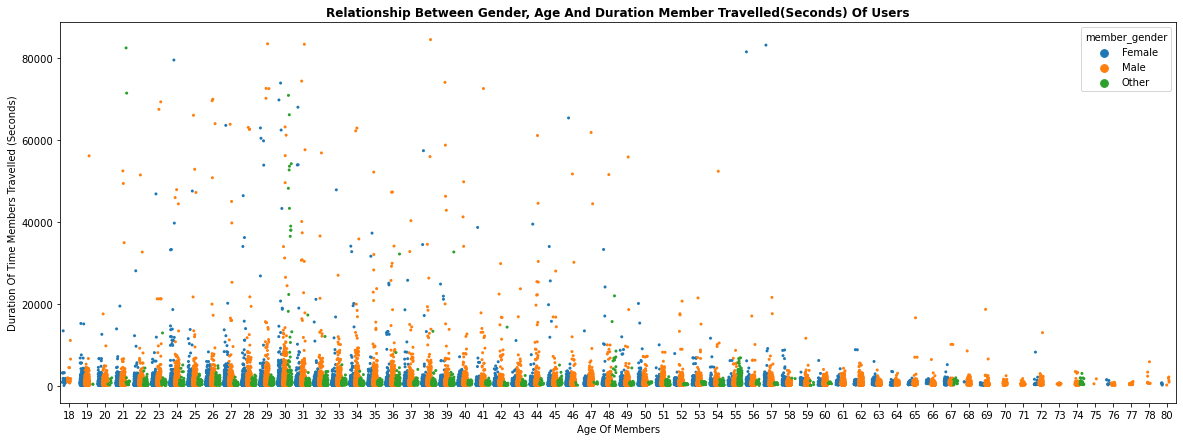

In [60]:
# remove outliers so as to get a better insight on the plot
data= new_df.query('duration_sec<duration_sec.quantile(0.99)')
scatter_vis(data= data, x= 'member_age', y= 'duration_sec', hue= 'member_gender')

# Observations
* Male has the largest distribution of data
* Female has the highest distribution of data
* Bikers that are between the age of 29-31 travelled for longer duration (seconds) as compared to bikers of other age group

In [61]:
new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


In [62]:
# Split datetime time into different column
new_df['time_started']= pd.to_datetime(new_df['start_time']).dt.time

In [63]:
new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,time_started
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,17:32:10.145000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,12:13:13.218000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,17:54:26.010000
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,23:54:18.549000
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,23:49:58.632000


In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  int32         
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  int32         
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  int64         
 12  user_type       

In [65]:
# Turn the time started into parts of day category
item= []
for items in new_df['time_started']:
    hour= items.hour
    if hour >=5 and hour < 12:
        item.append('morning')
    elif hour >= 12 and hour < 17:
        item.append('afternoon')
    elif hour >= 17 and hour < 21:
        item.append('evening')
    else:
        item.append('night')

In [66]:
# create part of the day column
new_df['part_of_day']= item

In [67]:
new_df.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,time_started,part_of_day
28050,791,2019-02-25 08:54:21.038,2019-02-25 09:07:32.811,102,Irwin St at 8th St,37.766883,-122.399579,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6588,Subscriber,1996,Male,No,23,08:54:21.038000,morning
158603,967,2019-02-05 18:43:05.477,2019-02-05 18:59:12.747,24,Spear St at Folsom St,37.789677,-122.390428,130,22nd St Caltrain Station,37.757288,-122.392051,5037,Subscriber,1993,Male,No,26,18:43:05.477000,evening
99161,296,2019-02-14 21:01:22.586,2019-02-14 21:06:19.083,88,11th St at Bryant St,37.770030,-122.411726,75,Market St at Franklin St,37.773793,-122.421239,2215,Subscriber,1987,Male,No,32,21:01:22.586000,night
133605,284,2019-02-08 18:45:06.652,2019-02-08 18:49:51.449,88,11th St at Bryant St,37.770030,-122.411726,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,492,Subscriber,1991,Male,No,28,18:45:06.652000,evening
83158,452,2019-02-18 07:57:24.368,2019-02-18 08:04:57.058,76,McCoppin St at Valencia St,37.771662,-122.422423,386,24th St at Bartlett St,37.752105,-122.419724,5417,Subscriber,1994,Female,No,25,07:57:24.368000,morning
88091,395,2019-02-16 20:13:28.833,2019-02-16 20:20:04.418,324,Union Square (Powell St at Post St),37.788300,-122.408531,323,Broadway at Kearny,37.798014,-122.405950,5910,Subscriber,1992,Male,No,27,20:13:28.833000,evening


In [68]:
new_df.part_of_day.value_counts()

morning      65206
evening      52624
afternoon    46003
night        10927
Name: part_of_day, dtype: int64

In [69]:
new_df[new_df.part_of_day=='night'].sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,time_started,part_of_day
9947,707,2019-02-27 22:36:47.556,2019-02-27 22:48:34.592,61,Howard St at 8th St,37.776513,-122.411306,118,Eureka Valley Recreation Center,37.759177,-122.436943,5221,Subscriber,1990,Male,No,29,22:36:47.556000,night
177480,1073,2019-02-01 21:18:26.691,2019-02-01 21:36:19.739,88,11th St at Bryant St,37.770030,-122.411726,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,1353,Subscriber,1993,Male,No,26,21:18:26.691000,night
216,442,2019-02-28 22:22:35.753,2019-02-28 22:29:58.555,129,Harrison St at 20th St,37.758862,-122.412544,104,4th St at 16th St,37.767045,-122.390833,5970,Subscriber,1991,Male,No,28,22:22:35.753000,night
17715,250,2019-02-26 21:00:59.555,2019-02-26 21:05:10.424,251,California St at University Ave,37.870555,-122.279720,245,Downtown Berkeley BART,37.870139,-122.268422,4667,Subscriber,1996,Female,Yes,23,21:00:59.555000,night


# Question
* What part of the day do bikers ride the most?

# What part of the day do bikers ride the most?
The parts of day that riders rides the most in this dataset was plotted on a bar chat.I discovered that bikers ride most in the morning and this could be as a result of the mild weather

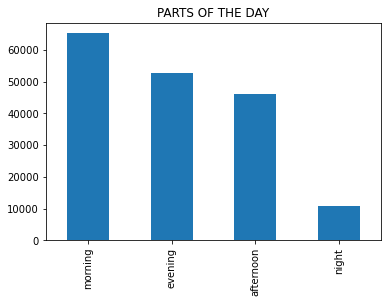

In [70]:
# Visualization
new_df.part_of_day.value_counts().plot.bar(title= 'PARTS OF THE DAY');

# Observation
* Bikers ride most in the morning, this could be as a result of the mild weather

# Question
* What is the relationship between Member gender and Part of the day that bikers ride

In [71]:
a= pd.crosstab(new_df['member_gender'], new_df['part_of_day'])
a

part_of_day,afternoon,evening,morning,night
member_gender,,,,
Female,10808,11908,16297,1758
Male,34165,39639,47675,8866
Other,1030,1077,1234,303


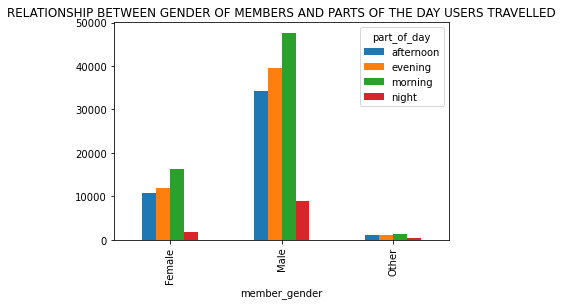

In [72]:
# Visualization
a.plot.bar(title='RELATIONSHIP BETWEEN GENDER OF MEMBERS AND PARTS OF THE DAY USERS TRAVELLED');

# Observation
* All genders ride more in the morning and lesser at night 

# Question
* What is the relationship between user types and part of the day

In [73]:
# check how part of day and user types columns correpond wtheach other.
# How many users ride at diffferent time of the day
b=pd.crosstab(new_df['part_of_day'], new_df['user_type'])
b

user_type,Customer,Subscriber
part_of_day,,
afternoon,5821,40182
evening,4422,48202
morning,5394,59812
night,920,10007


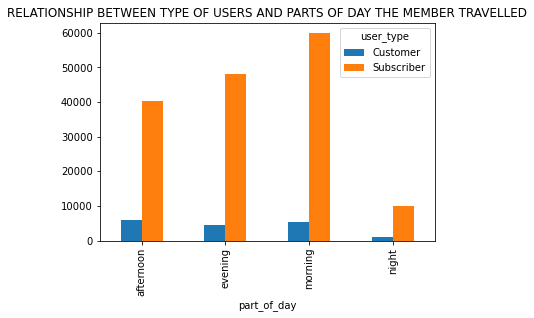

In [74]:
# Visualization
b.plot.bar(title= 'RELATIONSHIP BETWEEN TYPE OF USERS AND PARTS OF DAY THE MEMBER TRAVELLED');

# Observation
* Customers doesnt use the system as much as suscribers does even at all time of the day

# Question
* Whate is the relationship between how long a biker travelled and when they travelled

# Relationship between how long a biker travelled and when they travelled
This was plotted on a violin plot and i discovered that most bike riders ride in the morning and afternoon and they usually ride for time at this time of the day compared to night. Duration of seconds is Dependent on part of the day and Bike Riders that ride in the evening have large distribution

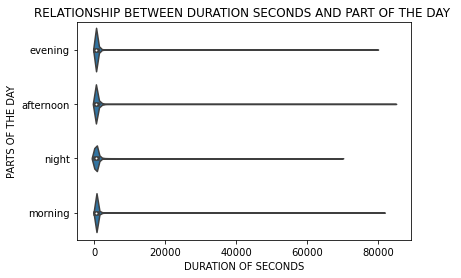

In [75]:
# Visualization
sns.violinplot(data= new_df, y= 'part_of_day', x= 'duration_sec', color=sns.color_palette()[0])
plt.ylabel('PARTS OF THE DAY')
plt.xlabel('DURATION OF SECONDS')
plt.title('RELATIONSHIP BETWEEN DURATION SECONDS AND PART OF THE DAY ');

# Observation
* Majority of bike riders ride in the morning and afternoon
* Duration of seconds is Dependent on part of the day
* Bike Riders that ride in the evening have large distribution

<a id='SUMMARY'></a>
# SUMMARY

The dataset used for this project was gotten from Ford Gobike Sysytem Data. This dataset includes information about individual rides made in  bike sharing system covering the greater San Fransisco Bay Area.
Excessive data assessment, cleaning and data visualization was done so as to get insights from the data.
Some of the insights gotten includes:
* Larger amount of bikers in san fransisco bay area are male
* Duration the bikers travel is not dependent on the users Gender
* Majority of Bikers ride in the morning while a very small percent of riders ride in the night
* Duration of seconds travelled is dependent on parts of the day
* Subscribers use the bike sharing system more than customers
* Bikers Age is dependent of Duration of Distance travelled

In [77]:
!jupyter nbconvert Data_visualization_project_2.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Data_visualization_project_2.ipynb to slides
[NbConvertApp] Writing 833999 bytes to Data_visualization_project_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_fil